## Python scripts to handle interfacial shear simulation results

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('classic')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
'''
import sys
sys.path.append("/Users/dixu/Desktop/interfacial_analysis")
from interface import *
'''

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


'\nimport sys\nsys.path.append("/Users/dixu/Desktop/interfacial_analysis")\nfrom interface import *\n'

In [216]:
#Global Constants
AREA = (20.5-0.5)*(20.341234-0.288675)

In [217]:
#readin histogram data
#assume only 1 dump 
def histo(file):
    f = open(file)
    heading=None
    x,y=[],[]
    for line in f:
        if line.startswith("#"):
            continue
        wd=line.split()
        if not heading: #heading not defined
            heading=wd
        else:
            x.append(wd[1])
            y.append(wd[2])
    f.close()
    x = map(float,x)
    y = map(float,y)
    f.close()
    return x,y,heading[2]

In [218]:
#file path setting
folder="/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Spherical/s05/100/e05/"
folder1="/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Nofiller/e05/"
folder2="/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Diblock/12/e05/"
folder3="/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Sheet/24Experimental_e05/"

In [219]:
histoA=folder+"polyA.histo"
histoB=folder+"polyB.histo"
histoF=folder+"filler.histo"
Ax,Ay,Acount=histo(histoA)
Bx,By,Bcount=histo(histoB)
Fx,Fy,Fcount=histo(histoF)

In [220]:
all(Ax==Bx) and all(Bx==Fx) #x check
hist=pd.DataFrame(np.array([Ay,By,Fy]).transpose(),index=np.array(Ax),columns=["PolyA","PolyB","Filler"])
hist=hist[hist.any(axis=1)>0]
hist=hist.assign(A= hist.PolyA/(hist.PolyA+hist.PolyB+hist.Filler))
hist=hist.assign(B= hist.PolyB/(hist.PolyA+hist.PolyB+hist.Filler))
hist=hist.assign(F= hist.Filler/(hist.PolyA+hist.PolyB+hist.Filler))
binsize=Ax[1]-Ax[0]
hist=hist.assign(Width = 4*hist.A*(1-hist.A)*binsize)
sum(hist.Width)

1.5793577968219268

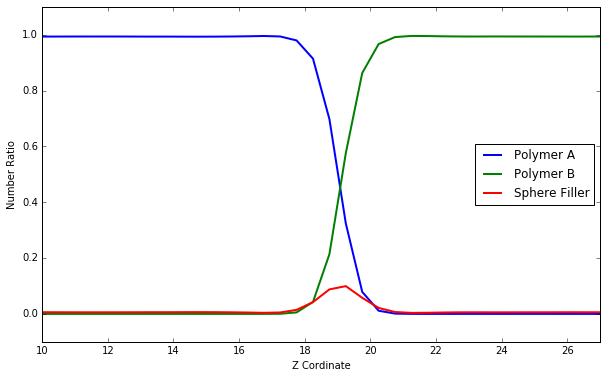

In [221]:
line1=plt.plot(hist.index,hist.A,label="Polymer A")
line2=plt.plot(hist.index,hist.B,label="Polymer B")
line3=plt.plot(hist.index,hist.F,label="Sphere Filler")
plt.xlabel("Z Cordinate")
plt.ylabel("Number Ratio")
plt.ylim(-0.1,1.1)
plt.xlim(10,27)
plt.setp([line1,line2,line3],linewidth=2.0)
plt.legend(loc="best")
plt.savefig("Histogram.png",dpi=300)
plt.show()

In [222]:
def player(file):
#layered pressure file handler
    '''
    readin layered pressure data 
    '''
    f = open(file)
    heading=None
    res=[]
    count=0;
    for line in f:
        if line.startswith("#"):
            continue
        wd=line.split()
        if not heading: #heading not defined
            heading=map(int,wd)
        else:
            count+=1
            res.append([str(heading[0])]+wd)
            if count%heading[1]==0:
                count=0
                heading=None
    f.close()
    return res

In [223]:
pf=folder+"Player2.txt"
#pf1=folder1+"Player2.txt"
pf2=folder2+"Player2.txt"
pf3=folder3+"Player2.txt"
press=pd.DataFrame(player(pf),columns=["Step","Layer","Cord","N","Px","Py","Pz"])
#press1=pd.DataFrame(player(pf1),columns=["Step","Layer","Cord","N","Px","Py","Pz"])
press2=pd.DataFrame(player(pf2),columns=["Step","Layer","Cord","N","Px","Py","Pz"])
press3=pd.DataFrame(player(pf3),columns=["Step","Layer","Cord","N","Px","Py","Pz"])
press=press.convert_objects(convert_numeric=True)
#press1=press1.convert_objects(convert_numeric=True)
press2=press2.convert_objects(convert_numeric=True)
press3=press3.convert_objects(convert_numeric=True)
binsize=press.iloc[1,2]-press.iloc[0,2]
#press.head(5)

/Users/dixu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/dixu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/dixu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


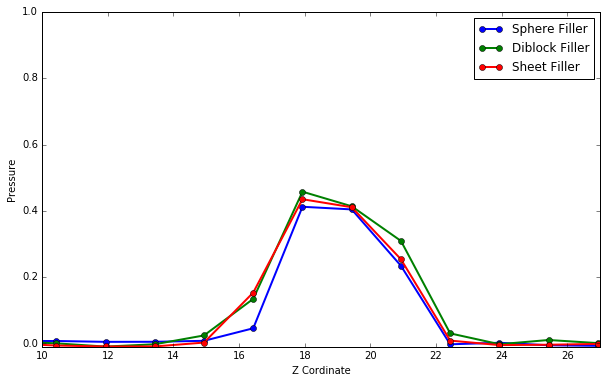

In [224]:
press["LambdaK"]=-press.N/AREA*(press.Pz-0.5*(press.Px+press.Py))  #2 is the bin size
#press1["LambdaK"]=-press1.N/AREA*(press1.Pz-0.5*(press1.Px+press1.Py))
press2["LambdaK"]=-press2.N/AREA*(press2.Pz-0.5*(press2.Px+press2.Py))
press3["LambdaK"]=-press3.N/AREA*(press3.Pz-0.5*(press3.Px+press3.Py))
pressure=press[press.Step==25000000].loc[:,["Cord","LambdaK"]]
#pressure1=press1[press1.Step==25000000].loc[:,["Cord","LambdaK"]]
pressure2=press2[press2.Step==25000000].loc[:,["Cord","LambdaK"]]
pressure3=press3[press3.Step==25000000].loc[:,["Cord","LambdaK"]]

line=plt.plot(pressure.Cord,pressure.LambdaK,"o-",linewidth=2.0,label="Sphere Filler")
#line1=plt.plot(pressure1.Cord,pressure1.LambdaK,"o-",linewidth=2.0,label="No Filler")
line2=plt.plot(pressure2.Cord,pressure2.LambdaK,"o-",linewidth=2.0,label="Diblock Filler")
line3=plt.plot(pressure3.Cord,pressure3.LambdaK,"o-",linewidth=2.0,label="Sheet Filler")
plt.xlabel("Z Cordinate")
plt.ylabel("Pressure")
plt.xlim(10,27)
plt.ylim(-0.01,1)
plt.legend(loc="best")
plt.savefig("InterfacialTension.png",dpi=300)
plt.show()

In [225]:
tension=pressure[(pressure["Cord"]>10) & (pressure["Cord"]<27)]
print "Unit-less interfacial tension approximate: "+str(sum(tension.LambdaK))

Unit-less interfacial tension approximate: 1.11004426564
